#Introduction

Name: Ansari Indrawan

As a data analyst, my role will be the analysis of sales of Adidas products in the year 2021. By examining trends, patterns and insights in the data, I will provide actionable recommendations to optimize marketing efforts, refine product offerings and drive sales growth.

#Import library

In [ ]:
#Load the requaired library for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#Problem Identificaion

##Problem Topic
Sales analysis of Adidas men's and women's products at Foot Locker

##Background
Adidas is a famous brand known worldwide in the sports apparel and footwear industry. Information on sales of Adidas products in various cities in the United States is available in this dataset. The available data includes details about the cities selling Adidas goods, unit pricing, sales volume, total sales, operating income, operating margin, and sales method.

##Problem Statement

Understand the sales characteristics of Adidas products at Foot Locker in different cities in different regions in 2021.


1. How does total revenue compare across regions?
2. What are the top products purchased in each city and state?
3. What are the sales results for each sales method in each region?
4. What is the relationship between unit price and operating margin for each product?
5. What are the sales characteristics of men's products in the Southeast region based on total sales revenue?
6. Is there a significant difference in total sales between men's and women's products?


#Data Loading

## Dasboard link
SALES OF ADIDAS IN THE FOOTLOCKER 2021
https://lookerstudio.google.com/s/o7xemjoGexo


source of dataset: https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

In [ ]:
#load the dataset
we = pd.read_excel('/content/drive/MyDrive/Adidas US Sales Datasets.xlsx')

In [ ]:
#first 5 data in dataset
we.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
#last 5 data in dataset
we.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [ ]:
#info from the dataset
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
#all column from the dataset
we.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

#Data Cleaning

In [ ]:
#missing value for each column
we.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
#rename columns
we_cleaned = we.rename(columns={'Retailer ID': 'retailer_id', 'Invoice Date': 'invoice_date', 'Price per Unit':'price_per_unit', 'Units Sold':'units_sold', 'Total Sales':'total_sales',
       'Operating Profit':'operating_profit', 'Operating Margin': 'operating_margin', 'Sales Method': 'transaction_method'})

In [ ]:
#obtain data on year 2021
we_new = we_cleaned[(we_cleaned['invoice_date'].dt.year == 2021)]

In [ ]:
#inspect typing errors
for all_col in ['Retailer', 'Product', 'transaction_method','Region']:
       print(we_new[all_col].value_counts(), '\n')

Foot Locker      2300
Sports Direct    1926
West Gear        1739
Kohl's           1022
Amazon            949
Walmart           410
Name: Retailer, dtype: int64 

Men's Athletic Footwear      1394
Women's Street Footwear      1392
Men's Street Footwear        1391
Women's Athletic Footwear    1390
Men's Apparel                1390
Women's Apparel              1389
Name: Product, dtype: int64 

Online      4359
Outlet      2534
In-store    1453
Name: transaction_method, dtype: int64 

Northeast    2145
West         1881
Midwest      1728
South        1512
Southeast    1080
Name: Region, dtype: int64 



In [ ]:
#obtain data FootLocker in Retailer column from dataset
we_new = we_new[we_new['Retailer'] == 'Foot Locker'].sort_values('invoice_date', ascending=True)

In [ ]:
#create new dataset with new index
adidas_FL = we_new.reset_index(drop=True)
adidas_FL

,Retailer,retailer_id,invoice_date,Region,State,City,Product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,transaction_method
0,Foot Locker,1197831,2021-01-05,South,Louisiana,New Orleans,Women's Street Footwear,30.0,475,142500.0,42750.00,0.30,Online
1,Foot Locker,1197831,2021-01-05,South,Louisiana,New Orleans,Men's Apparel,28.0,111,3108.0,870.24,0.28,Outlet
2,Foot Locker,1197831,2021-01-05,South,Louisiana,New Orleans,Women's Athletic Footwear,26.0,166,4316.0,1812.72,0.42,Outlet
3,Foot Locker,1197831,2021-01-05,South,Louisiana,New Orleans,Women's Street Footwear,21.0,162,3402.0,1258.74,0.37,Outlet
4,Foot Locker,1197831,2021-01-05,South,Louisiana,New Orleans,Men's Athletic Footwear,20.0,209,4180.0,1504.80,0.36,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Foot Locker,1185732,2021-12-30,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,57.0,53,3021.0,1601.13,0.53,Online
2296,Foot Locker,1185732,2021-12-30,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,40.0,53,2120.0,954.00,0.45,Outlet
2297,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56,2576.0,1004.64,0.39,Outlet
2298,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47,2961.0,1362.06,0.46,Online


Since there are no missing values and only a few columns need to be renamed for easier code writing without spaces in column names, the data cleaning process involves checking, renaming columns, and extracting data for the year 2021 in Foot Locker retailer from dataset

# Data Analitycs

## problem no.1
How does the total sales compare among different regions?

In [ ]:
region_sales = adidas_FL.groupby('Region', as_index=False).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=True)
region_sales = region_sales.reset_index(drop=True)
region_sales

,Region,total_sales
0,South,9307025.0
1,West,36336666.0
2,Northeast,40101613.0
3,Midwest,41367829.0
4,Southeast,50104782.0


### Visualization

Visualization in pie chart

<Axes: title={'center': 'Total Sales in all region'}, ylabel='total_sales'>

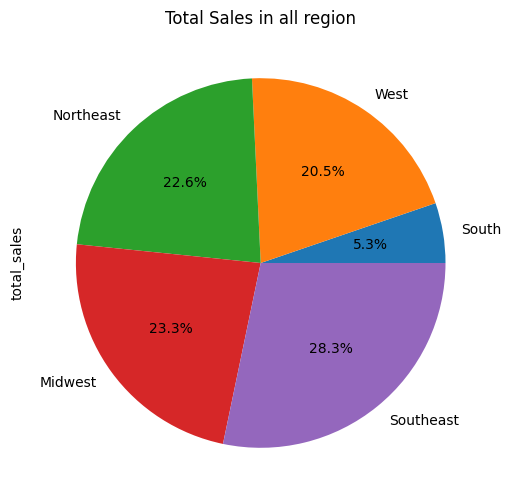

In [ ]:
region_sales['total_sales'].plot(kind='pie',
                                 labels=region_sales['Region'],
                                 figsize=(6,6),
                                 title="Total Sales in all region",
                                 autopct='%1.1f%%')


Based on the pie chart, the total sales from all regions are shown, and the highest sales are found in the Southeast region with a total sales of 28.3% of all regions, amounting to 50,104,782. Meanwhile, the lowest sales are in the South region with only 5.3% of total sales, amounting to 9,307,025.

## Problem no.2
Which products are the most purchased in each city and state?

In [ ]:
product_sales = adidas_FL.groupby(['City', 'Product'], as_index=False).agg({'units_sold':'sum'})
product_most_sales = product_sales.loc[product_sales.groupby(['City'])['units_sold'].idxmax()
                                        ].sort_values(by='units_sold', ascending=True)

product_most_sales.reset_index(drop=True)

,City,Product,units_sold
0,Dallas,Men's Street Footwear,664
1,Knoxville,Men's Street Footwear,684
2,Los Angeles,Men's Street Footwear,746
3,Anchorage,Men's Street Footwear,1102
4,Cheyenne,Women's Street Footwear,1594
5,Detroit,Women's Street Footwear,1804
6,Fargo,Men's Street Footwear,2378
7,New Orleans,Women's Street Footwear,2391
8,Louisville,Men's Street Footwear,2597
9,Wichita,Men's Street Footwear,2618


### Visualization

Visualization in Bar chart horizontal

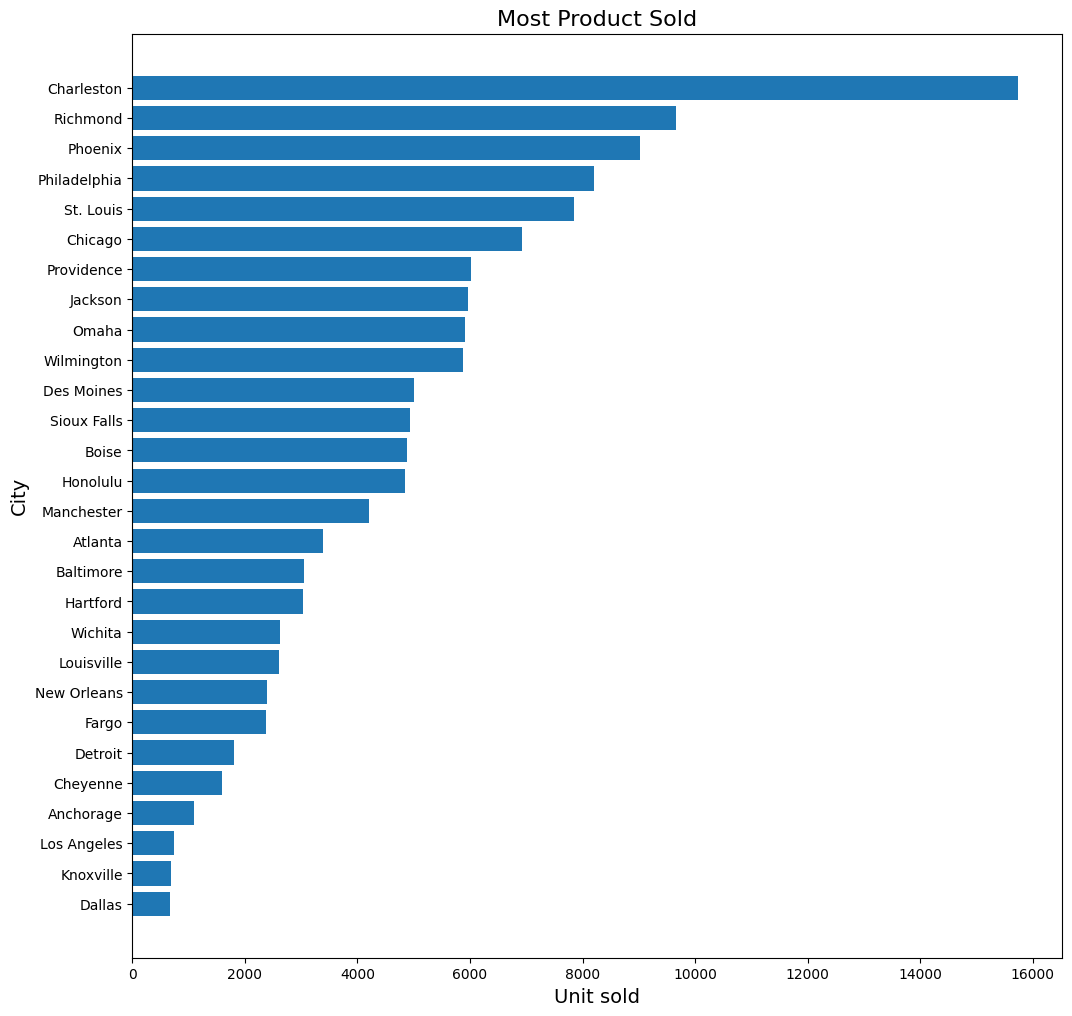

In [ ]:
plt.figure(figsize=(12,12))
plt.barh(product_most_sales['City'], product_most_sales['units_sold'])
plt.title('Most Product Sold', fontsize = 16)
plt.ylabel('City', fontsize = 14)
plt.xlabel('Unit sold', fontsize = 14)
plt.show()

Based on the bar chart, we can identify the cities included in the scope of Adidas product sales by Foot Locker. The city with the highest purchasing level is Charleston, with 15,741 units sold of Men's Street Footwear. The city with the lowest purchasing level is Dallas, with only 664 units sold of Men's Street Footwear.

## Problem no.3

What are the sales outcomes for each sales method in each region?

In [ ]:
sales_by_method = adidas_FL.groupby(['Region', 'transaction_method'], as_index=False
                                    ).agg({'total_sales':'sum'}).sort_values(by='Region', ascending=True)
sales_by_method

,Region,transaction_method,total_sales
0,Midwest,In-store,17369000.0
1,Midwest,Online,10022579.0
2,Midwest,Outlet,13976250.0
3,Northeast,In-store,23552750.0
4,Northeast,Online,990844.0
5,Northeast,Outlet,15558019.0
6,South,Online,8392326.0
7,South,Outlet,914699.0
8,Southeast,In-store,17247500.0
9,Southeast,Online,32357973.0


### Visualization

Visualization in Bar chart

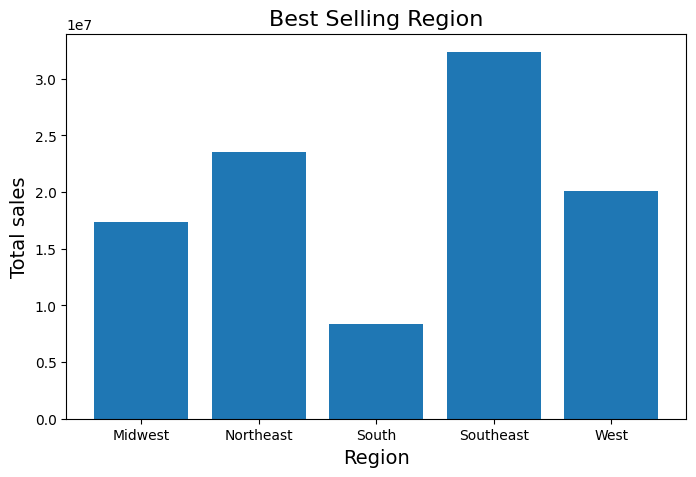

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_method['Region'], sales_by_method['total_sales'])
plt.title('Best Selling Region', fontsize = 16)
plt.ylabel('Total sales', fontsize = 14)
plt.xlabel('Region', fontsize = 14)
plt.show()

From the bar chart above, we can see that there are 5 regions selling Adidas products at Foot Locker. Based on the sales method, the region with the highest sales level is Southeast with total sales of In-store 17,247,500.0, Online 32,357,973.0, and Outlet 499,309.0. The region with the lowest sales is South, with sales from Online only 8,392,326.0 and Outlet only 914,699.0. South is considered lower because it only utilizes 2 transaction methods.

##Problem no.4
What is the relation between price per unit and operating margin for each product?

In [ ]:
online_profit = adidas_FL[
    (adidas_FL["transaction_method"] == 'Online')
    ].groupby(['City','Product'], as_index=False).agg({'operating_profit':'sum'}).sort_values(by='operating_profit', ascending=True)
online_profit.reset_index(drop=True)

,City,Product,operating_profit
0,Knoxville,Women's Athletic Footwear,271.89
1,Dallas,Women's Athletic Footwear,368.22
2,Anchorage,Men's Apparel,634.80
3,Los Angeles,Women's Athletic Footwear,654.16
4,Knoxville,Women's Street Footwear,748.80
...,...,...,...
157,Phoenix,Men's Athletic Footwear,1057094.86
158,Charleston,Men's Apparel,1443188.17
159,Charleston,Men's Athletic Footwear,1443739.77
160,Charleston,Women's Apparel,2453363.93


### Visualisasi

Visualization in Bar chart horizontal

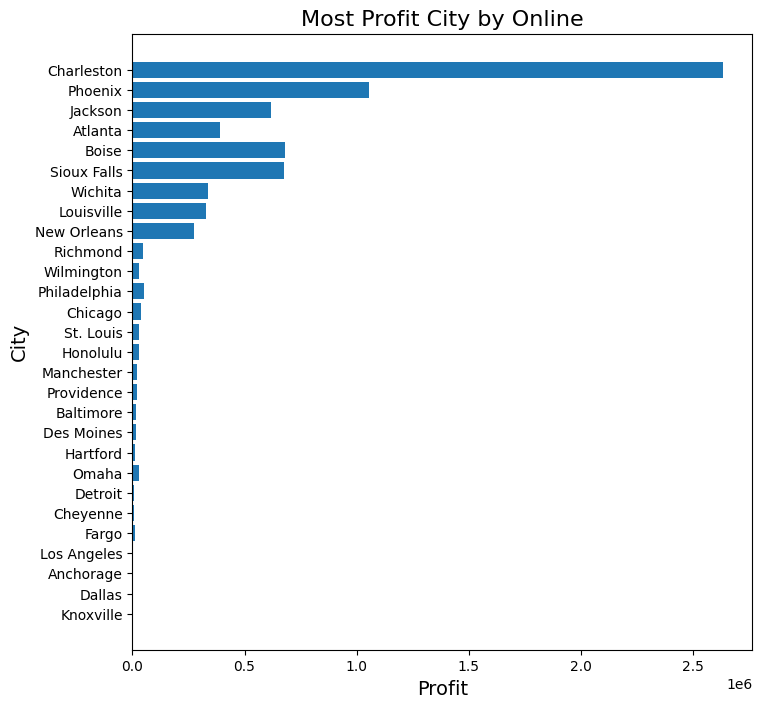

In [ ]:
plt.figure(figsize=(8,8))
plt.barh(online_profit['City'], online_profit['operating_profit'])
plt.title('Most Profit City by Online', fontsize = 16)
plt.ylabel('City', fontsize = 14)
plt.xlabel('Profit', fontsize = 14)
plt.show()

Based on the bar chart, we can see which cities have generated profit from online sales in 2021. The city with the highest profit in sales is Charleston, with a profit value of 2,633,578.32 for Men's Street Footwear. The city that provides the lowest profit is Knoxville, with a profit of 271.89 for Women's Athletic Footwear. There is a difference in consumer purchasing behavior between the city with the highest and lowest profit, which may be one of the influencing factors on sales.

##Problem no.5
What are the sales characteristics of men's products in the Southeast region based on the total sales proceeds?

In [ ]:
mens_wear_sales = adidas_FL[
    (adidas_FL["Product"].str.contains('Men')) &
    (adidas_FL["Region"] == 'Southeast')
    ].groupby(['Region','Product','invoice_date'], as_index=False)[['units_sold','total_sales']].sum()
mens_wear_sales

,Region,Product,invoice_date,units_sold,total_sales
0,Southeast,Men's Apparel,2021-01-09,1161,380028.0
1,Southeast,Men's Apparel,2021-01-20,540,174370.0
2,Southeast,Men's Apparel,2021-02-07,889,359261.0
3,Southeast,Men's Apparel,2021-02-24,202,58977.0
4,Southeast,Men's Apparel,2021-03-05,806,288671.0
...,...,...,...,...,...
70,Southeast,Men's Street Footwear,2021-11-06,1203,522650.0
71,Southeast,Men's Street Footwear,2021-11-24,903,271142.0
72,Southeast,Men's Street Footwear,2021-12-05,1365,771930.0
73,Southeast,Men's Street Footwear,2021-12-21,683,350572.0


The table above is intended to facilitate answering the fifth problem, where descriptive statistical analysis can be performed by examining the central tendency of the data.


### Central tendency

#### mean

In [ ]:
a1=mens_wear_sales['units_sold'].mean()
b1=mens_wear_sales['total_sales'].mean()

print('rata-rata dari produk yang terjual:',a1)
print('rata-rata dari total penjualan:',b1)

rata-rata dari produk yang terjual: 909.68
rata-rata dari total penjualan: 368780.82666666666


#### median

In [ ]:
a2=mens_wear_sales['units_sold'].sort_values(ascending=True).median()

b2=mens_wear_sales['total_sales'].sort_values(ascending=True).median()

print('nilai tengah dari produk yang terjual:',a2)
print('nilai tengah dari total penjualan:',b2)

nilai tengah dari produk yang terjual: 921.0
nilai tengah dari total penjualan: 350589.0


#### mode

In [ ]:
m3 = mens_wear_sales['Product'].mode()

print('produk yang paling banyak dicari:','\n', m3)

produk yang paling banyak dicari: 
 0              Men's Apparel
1    Men's Athletic Footwear
2      Men's Street Footwear
Name: Product, dtype: object


#### standard deviation

In [ ]:
std_unitsold = mens_wear_sales['units_sold'].std()
std_totalsales = mens_wear_sales['total_sales'].std()

print('Standar Deviasi Produk Terjual:', std_unitsold)
print('Standar Deviasi Total Penjualan:', std_totalsales)

Standar Deviasi Produk Terjual: 355.4859316028801
Standar Deviasi Total Penjualan: 184067.43953789634


### Visualizaion

Visualization using Line chart

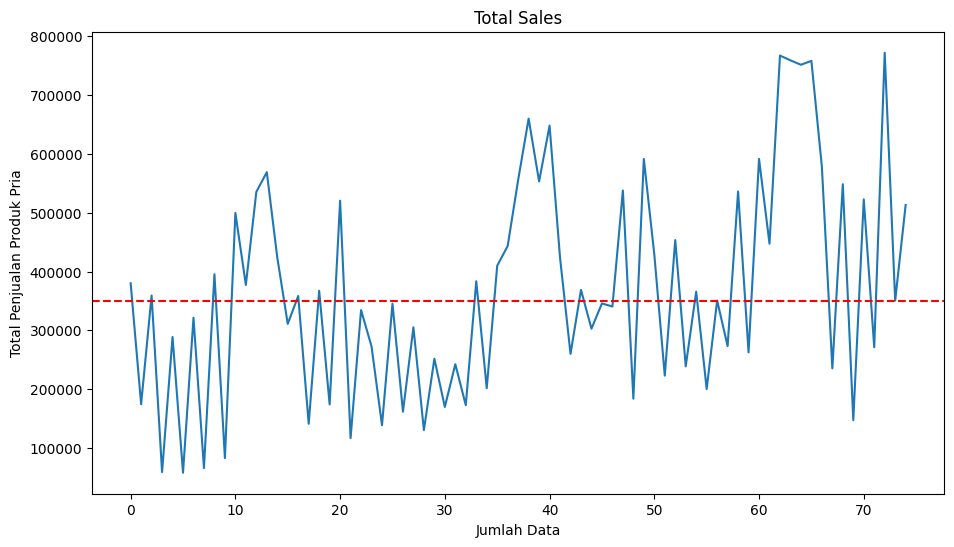

In [ ]:
# Membuat line dari total sales
plt.figure(figsize=(11,6))
plt.plot(mens_wear_sales['total_sales'])
plt.title('Total Sales')
plt.xlabel('Jumlah Data')
plt.ylabel('Total Penjualan Produk Pria')
plt.axhline(y=b2, color='red', linestyle = '--')

# Menampilkan plot
plt.show()

Based on the Line chart, it shows the sales characteristics of men's products in the Southeast region over a total of 75 recorded transaction days. The red dashed line represents the average value of total sales in the Southeast region, which is 368,780 sales in 75 days.

## Problem no.6
Is there a significant difference in total sales between men's and women's products?

In [ ]:
adidas_FL.tail()

,Retailer,retailer_id,invoice_date,Region,State,City,Product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,transaction_method
2295,Foot Locker,1185732,2021-12-30,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,57.0,53,3021.0,1601.13,0.53,Online
2296,Foot Locker,1185732,2021-12-30,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,40.0,53,2120.0,954.00,0.45,Outlet
2297,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56,2576.0,1004.64,0.39,Outlet
2298,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47,2961.0,1362.06,0.46,Online
2299,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70.0,175,122500.0,42875.00,0.35,Outlet


In [ ]:
mens_wear_totalsales = adidas_FL[
    (adidas_FL["Product"].str.contains('Men'))
    ].groupby(['Region','Product','invoice_date'], as_index=False)[['units_sold','total_sales']].sum()
mens_wear_totalsales

,Region,Product,invoice_date,units_sold,total_sales
0,Midwest,Men's Apparel,2021-01-06,192,61596.0
1,Midwest,Men's Apparel,2021-01-12,219,89612.0
2,Midwest,Men's Apparel,2021-01-18,423,133822.0
3,Midwest,Men's Apparel,2021-02-06,188,61444.0
4,Midwest,Men's Apparel,2021-02-12,221,89708.0
...,...,...,...,...,...
462,West,Men's Street Footwear,2021-09-24,926,272037.0
463,West,Men's Street Footwear,2021-10-23,805,236655.0
464,West,Men's Street Footwear,2021-11-23,785,235320.0
465,West,Men's Street Footwear,2021-12-04,1248,448432.0


In [ ]:
womens_wear_totalsales = adidas_FL[
    (adidas_FL["Product"].str.contains('Women'))
    ].groupby(['Region','Product','invoice_date'], as_index=False)[['units_sold','total_sales']].sum()
womens_wear_totalsales

,Region,Product,invoice_date,units_sold,total_sales
0,Midwest,Women's Apparel,2021-01-06,325,77100.0
1,Midwest,Women's Apparel,2021-01-12,347,112664.0
2,Midwest,Women's Apparel,2021-01-18,548,131067.0
3,Midwest,Women's Apparel,2021-02-06,318,38452.0
4,Midwest,Women's Apparel,2021-02-12,355,98810.0
...,...,...,...,...,...
462,West,Women's Street Footwear,2021-09-24,698,201684.0
463,West,Women's Street Footwear,2021-10-23,527,153695.0
464,West,Women's Street Footwear,2021-11-23,604,177462.0
465,West,Women's Street Footwear,2021-12-04,1074,425337.0


### Hypothesis testing

In [ ]:
w_sales = womens_wear_totalsales['total_sales'].mean()
m_sales = mens_wear_totalsales['total_sales'].mean()

print('nilai rata rata penjualan produk wanita:',w_sales)
print('nilai rata rata penjualan produk pria:',m_sales)

nilai rata rata penjualan produk wanita: 167920.9743040685
nilai rata rata penjualan produk pria: 211560.64239828693


To determine whether or not the average sales of adidas products for men and women have increased, two calculations are performed using hypothesis testing, with a significance level of 0.05.

- Hypothesis for women's products:

`H0: μ <= 170000`

`H1: μ  > 170000`

- hypothesis untuk produk pria:

`H0: μ <= 220000`

`H1: μ  > 220000`

In [ ]:
#menetukan nilai t stat dan P val produk wanita
t_stat,p_val = stats.ttest_1samp(womens_wear_totalsales.total_sales, 170000)

print('Nilai untuk produk wanita:')
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

Nilai untuk produk wanita:
P-value: 0.3682479675362116
t-statistics: -0.33669828031026394


In [ ]:
#menetukan nilai t stat dan P val produk wanita
t_stat,p_val = stats.ttest_1samp(mens_wear_totalsales.total_sales, 220000)

print('Nilai untuk produk pria:')
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

Nilai untuk produk pria:
P-value: 0.10839283068834021
t-statistics: -1.236796271747063


#### Hypothesis Results
With the initial hypothesis condition for female products, namely total sales less than or equal to 170000 and alternative hypotheses greater than 170000 and for males, namely total sales less than or equal to 220000 and alternative hypotheses greater than 220000. Based on the p-value obtained, namely 0.368 and o.108, the initial hypothesis cannot be rejected because the value of the risk of error is set at 0.05 and it can be concluded that there is no significant difference in total sales of male and female products.

### Visualisasi

Visualized in the form of Scatter Plot

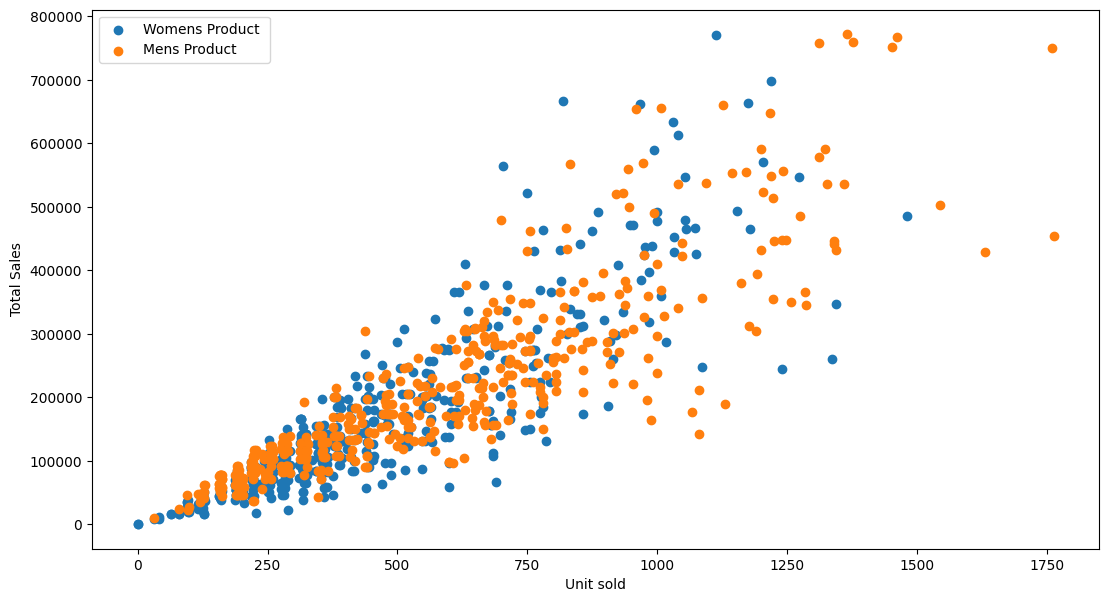

In [ ]:
plt.figure(figsize=(13,7))
plt.scatter(womens_wear_totalsales['units_sold'], womens_wear_totalsales['total_sales'], label='Womens Product ')
plt.scatter(mens_wear_totalsales['units_sold'], mens_wear_totalsales['total_sales'], label='Mens Product ')
plt.xlabel('Unit sold')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Based on the scatter plot above, it shows the relationship between products sold and total sales, where the distribution of data accumulates more on the lower left, indicating a negative relationship between the two variables. the distribution of data also spreads diagonally from the lower left, this shows that the more total sales the less products sold, but it can also mean that total sales are high but products sold are low or vice versa.